# FitzHugh-Nagumo Time Series

本笔记生成FitzHugh-Nagumo系统的若干序列，随机挑选五条样本，
对每条序列在同一张图中绘制快变量 `v` 与慢变量 `w`，并保持统一的尺度。

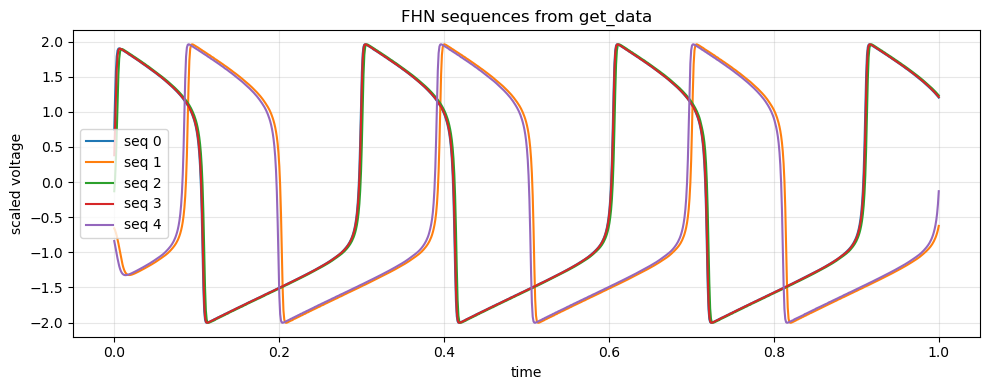

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from data import get_data

v_series, _ = get_data(5)         
v_series = v_series.squeeze(-1)   

time = np.linspace(0., 1., v_series.shape[1])

plt.figure(figsize=(10, 4))
for idx, v in enumerate(v_series):
    plt.plot(time, v, label=f'seq {idx}')
plt.xlabel('time')
plt.ylabel('scaled voltage')
plt.title('FHN sequences from get_data')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()